# Task 1: API ที่นำมาใช้

จัดทำโดย นายตุลธร วงศ์ชัย รหัสนักศึกษา 63070224

สำหรับ API ที่นำมาใช้งานมีชื่อว่า ภาษีไปไหน? ซึ่งเกี่ยวกับการใช้งบประมาณจากภาษีของประชาชนแจกจ่ายไปให้แก่หน่วยงานของภาครัฐ source: https://govspending.data.go.th/api/documentation

## Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import urllib.request
import json
import csv
from datetime import datetime
import numpy as np

In [2]:
api_key = "Y8DPWYVlNC4668nI7DjJS3GSmQR4ZcVR"

# Task 2: Collect data from API

ทางผู้จัดทำต้องการข้อมูลของหน่วยงานที่อยู่ใน `กรุงเทพมหานคร` จึงมีวิธีขึ้นตอนดังนี้
1. ทำการ requests เพื่อหา `dept_code` ของ `กรุงเทพมหานคร`
2. นำ `dept_code` ที่ได้จากขึ้นตอนแรกมาเป็น parameter เพื่อใช้ในการ requests ข้อมูลของ `กรุงเทพมหานคร`
3. ทำการเขียนข้อมูลที่ได้รับ response กลับมาให้อยู่ใน format `.csv`

In [3]:
def find_dept_code(dept_name, api_key):
  url = f"https://opend.data.go.th/govspending/egpdepartment?api-key={api_key}&limit=10&dept_name={dept_name}"
  response = requests.get(url)
  data = response.json()

  bkk_code = ''
  for i in data['result']:
    if i['dept_name'] == 'กรุงเทพมหานคร':
      bkk_code = i['dept_code']
      break

  return bkk_code  # string

def get_raw_data(limit, api_key, year, dept_code):
  url = f"https://opend.data.go.th/govspending/cgdcontract?api-key={api_key}&year={year}&limit={limit}&dept_code={dept_code}"
  response = requests.get(url)
  data = response.json()
  data = data['result']

  for i in data: # ทำการแตกข้อมูลใน list ของ contract ออกมา
    i.update(i['contract'][0])
    del i['contract']

  return data # object(dict)

def write_to_csv(file_path, heading, rows):
  with open(file_path, 'w', encoding='UTF8', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=heading)
    writer.writeheader()
    writer.writerows(rows)


# Task 3: Parse the data to .csv format

สร้าง folder ที่ชื่อว่า data แล้วสร้างไฟล์เปล่า bkk_CGDContract_data.csv ด้วย UNIX Command

In [4]:
!mkdir data
!cd data && touch bkk_CGDContract_data.csv

นำ function ที่สร้างจาก Task2 มาใช้ในการดึงข้อมูล โดยจะดึงข้อมูลจากหน่วยงาน `กรุงเทพมหานคร` จากปี พ.ศ. 2558 - 2564 ปีละ 400 objects รวมเป็น 2800 objects

In [7]:
# หา dept_code ของ "กรุงเทพมหานคร"
bkk_dept_code = find_dept_code("กรุงเทพมหานคร", api_key)

# ดึงข้อมูลจากหน่วยงาน "กรุงเทพมหานคร" จากปี พ.ศ. 2558 - 2564 ปีละ 400 objects รวมเป็น 2800 objects
raw_data = []
for year in range(2558, 2565):
  raw_data += get_raw_data(400, api_key, year, bkk_dept_code)

In [8]:
# หา columns ของข้อมูล
heading = list(raw_data[0].keys())
heading

['project_id',
 'project_name',
 'project_type_name',
 'dept_name',
 'dept_sub_name',
 'purchase_method_name',
 'purchase_method_group_name',
 'announce_date',
 'project_money',
 'price_build',
 'sum_price_agree',
 'budget_year',
 'transaction_date',
 'province',
 'district',
 'subdistrict',
 'project_status',
 'project_location',
 'geom',
 'winner_tin',
 'winner',
 'contract_no',
 'contract_date',
 'contract_finish_date',
 'price_agree',
 'status']

เขียนข้อมูลลงบนไฟล์ bkk_CGDContract_data.csv ไว้ใน folder data

In [10]:
write_to_csv('data/bkk_CGDContract_data.csv', heading, raw_data)

# Task 4: Load Data and Pre-processing

หลังจากได้ไฟล์ bkk_CGDContract_data.csv ที่มีข้อมูลทั้งหมด 2800 แถว จึงนำมาทำการอ่านข้อมูลใน pandas และทำการ pre-processing ก่อนนำไปวิเคราะห์ต่อไป

In [74]:
df = pd.read_csv('data/bkk_CGDContract_data.csv', encoding='utf8')
df

,project_id,project_name,project_type_name,dept_name,dept_sub_name,purchase_method_name,purchase_method_group_name,announce_date,project_money,price_build,...,project_status,project_location,geom,winner_tin,winner,contract_no,contract_date,contract_finish_date,price_agree,status
0,57085094977,ประกวดราคาจ้างเหมาเอกชนขนมูลฝอยจากศูนย์กำจัดมู...,จ้างทำของ/จ้างเหมาบริการ,กรุงเทพมหานคร,กองกำจัดมูลฝอย สำนักสิ่งแวดล้อม,ประกวดราคาด้วยวิธีการทางอิเล็กทรอนิกส์,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,27 ส.ค. 57,"4,455,190,000","4,480,010,000",...,ระหว่างดำเนินการ,"{'lat': 13.7780980259196, 'lon': 100.565063509...",POINT(100.56506350980077 13.778098025919627),0735525000192,บริษัท วัสดุภัณฑ์ธุรกิจ จำกัด,สสล. 1/2558,13 ต.ค. 57,4 พ.ย. 67,"4,436,575,000",ระหว่างดำเนินการ
1,57055187213,ประกวดราคาเช่าเช่ารถบรรทุกน้ำอเนกประสงค์ ระยะท...,เช่า,กรุงเทพมหานคร,สำนักงานสวนสาธารณะ สำนักสิ่งแวดล้อม กรุงเทพมหานคร,ประกวดราคาด้วยวิธีการทางอิเล็กทรอนิกส์,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,29 ก.ค. 57,"1,377,660,460","1,377,660,460",...,ระหว่างดำเนินการ,"{'lat': 13.7780980259196, 'lon': 100.565063509...",POINT(100.56506350980077 13.778098025919627),0105528040905,บริษัท อิทธิพรอิมปอร์ต จำกัด,สสล.3/2558,22 ต.ค. 57,1 ม.ค. 66,"1,372,035,060",ระหว่างดำเนินการ
2,57055063869,ประกวดราคาซื้อโครงการจัดหาเครื่องมือหนักสำหรับ...,ซื้อ,กรุงเทพมหานคร,สำนักการโยธา กรุงเทพมหานคร,ประกวดราคาด้วยวิธีการทางอิเล็กทรอนิกส์,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,10 พ.ย. 57,"1,000,000,000","1,000,000,000",...,ระหว่างดำเนินการ,"{'lat': 13.7780980259196, 'lon': 100.565063509...",POINT(100.56506350980077 13.778098025919627),0105556183774,บริษัท วีก้า อินเตอร์เทรด จำกัด,สนย.10/2558,15 ก.ค. 58,9 ก.ค. 59,"993,200,000",ระหว่างดำเนินการ
3,58185000059,ประกวดราคาจ้างโครงการก่อสร้างถนนศรีนครินทร์ - ...,จ้างก่อสร้าง,กรุงเทพมหานคร,สำนักการโยธา กรุงเทพมหานคร,ประกวดราคาด้วยวิธีการทางอิเล็กทรอนิกส์,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,1 ม.ค. 44,"934,800,000","934,800,000",...,ระหว่างดำเนินการ,"{'lat': 13.7780980259196, 'lon': 100.565063509...",POINT(100.56506350980077 13.778098025919627),0993000328485,กิจการร่วมค้า KRR - KRC JV,สนย.51/2558,23 ก.ค. 58,-,"934,800,000",ระหว่างดำเนินการ
4,58185000047,ประกวดราคาจ้างโครงการก่อสร้างถนนศรีนครินทร์ - ...,จ้างก่อสร้าง,กรุงเทพมหานคร,สำนักการโยธา กรุงเทพมหานคร,ประกวดราคาด้วยวิธีการทางอิเล็กทรอนิกส์,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,1 ม.ค. 44,"885,700,000","885,700,000",...,ระหว่างดำเนินการ,"{'lat': 13.7780980259196, 'lon': 100.565063509...",POINT(100.56506350980077 13.778098025919627),0105497000257,บริษัท สหการวิศวกร จำกัด,สนย.48/2558,20 ก.ค. 58,-,"885,700,000",ระหว่างดำเนินการ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,63127340142,ซื้อจัดซื้ออาหารเสริม (นม) ยู.เอช.ที บรรจุกล่อ...,ซื้อ,กรุงเทพมหานคร,สำนักงานเขตมีนบุรี,เฉพาะเจาะจง,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,-,"6,492,266","6,492,266",...,ระหว่างดำเนินการ,"{'lat': 0, 'lon': 0}",NaN,0994000237545,สหกรณ์โคนมไทยมิลค์ จำกัด,11-15-64,27 พ.ย. 63,14 มี.ค. 64,"6,492,266",ระหว่างดำเนินการ
2796,63107041439,ประกวดราคาจ้างก่อสร้างปรับปรุงโรงเรียนวัดปลูกศ...,จ้างก่อสร้าง,กรุงเทพมหานคร,สำนักงานเขตลาดกระบัง,ประกวดราคาอิเล็กทรอนิกส์ (e-bidding),วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,28 ธ.ค. 63,"7,485,000","7,455,079",...,ระหว่างดำเนินการ,"{'lat': 13.7270453005107, 'lon': 100.768167972...",POINT(100.7681679725647 13.727045300510657),0105542057844,บริษัท อีเทอร์นิตี้ คอนสตรัคชั่น จำกัด,15/2564,22 มี.ค. 64,20 ก.ค. 64,"6,489,200",ระหว่างดำเนินการ
2797,63117202387,ประกวดราคาซื้อเครื่องตรวจสอบเปอร์เซ็นต์ทอง 16 ...,ซื้อ,กรุงเทพมหานคร,สำนักงานสถานธนานุบาลกรุงเทพมหานคร,ประกวดราคาอิเล็กทรอนิกส์ (e-bidding),วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,14 ธ.ค. 63,"6,505,600","6,505,600",...,ระหว่างดำเนินการ,"{'lat': 0, 'lon': 0}",NaN,0105536062661,บริษัท ควอลิตี้ รีพอร์ท จำกัด,3/2564,29 มี.ค. 64,28 พ.ค. 64,"6,432,000",ระหว่างดำเนินการ
2798,63127027453,ซื้อยา Losartan potassium tablets ๕๐ mg 

Replace "-" to null

In [75]:
df = df.replace({'-': None})

 เนื่องจากข้อมูลวันที่อยู่ในรูปแบบของไทย จึงสร้างฟังชั่นเพื่อแปลงให้อยู่ในรูปแบบที่อ่านได้ใน pandas
 ได้แก่ columns `announce_date`, `transaction_date`, `contract_date`, `contract_finish_date`

In [76]:
# Parse Thai date to general date
def convert_thai_date(value):
  if value == None:
    return None

  value = value.split(' ')
  day, th_month, th_year = value[0], value[1], '25' + value[2]

  thai_abbr_months = {
      "ม.ค.": "01",
      "ก.พ.": "02",
      "มี.ค.": "03",
      "เม.ย.": "04",
      "พ.ค.": "05",
      "มิ.ย.": "06",
      "ก.ค.": "07",
      "ส.ค.": "08",
      "ก.ย.": "09",
      "ต.ค.": "10",
      "พ.ย.": "11",
      "ธ.ค.": "12",
  }

  # แปลงให้อยู่ในรูปแบบ str -> 'y/m/d' แล้วนำมาแปลงเป็นข้อมูลวันที่ด้วย packages datetime.strptime
  converted_date = str(int(th_year) - 543) + "/" + thai_abbr_months[th_month] + "/" + str(day)
  date_obj = datetime.strptime(converted_date , '%Y/%m/%d').date()

  return date_obj

date_cols = ['announce_date', 'transaction_date', 'contract_date', 'contract_finish_date']

for col in date_cols:
  df[col] = df[col].apply(lambda x: convert_thai_date(x))

เนื่องจากข้อมูลตัวเลขอยู่ในรูปแบบ string และคั่นหลักด้วย "," จึงทำการแปลงให้เป็น integer
ได้แก่ columns `project_money`, `price_build`, `sum_price_agree`, `price_agree`

In [77]:
# Parse comma number to integer
price_cols = ['project_money', 'price_build', 'sum_price_agree', 'price_agree']

for col in price_cols:
  df[col] = df[col].apply(lambda x: int(str(x).replace(',', '')) if x != None else x)

ทำ budget_year ให้เป็น ค.ศ.

In [78]:
df['budget_year'] = df['budget_year'] - 543

Drop columns ที่ไม่จะไม่นำมาใช้
    ** province และ dept_name มีค่าเดียวคือ `กรุงเทพมหานคร`

In [79]:
df = df.drop(columns=['project_id', 'province', 'dept_name', 'project_location', 'geom', 'winner_tin', 'contract_no'])

In [80]:
df.isnull().sum()

project_name                     0
project_type_name                0
dept_sub_name                    0
purchase_method_name             0
purchase_method_group_name       0
announce_date                 1043
project_money                    0
price_build                      5
sum_price_agree                  0
budget_year                      0
transaction_date                 0
district                        15
subdistrict                     15
project_status                   0
winner                           1
contract_date                    0
contract_finish_date           358
price_agree                      0
status                           0
dtype: int64

In [81]:
df.isna().sum()

project_name                     0
project_type_name                0
dept_sub_name                    0
purchase_method_name             0
purchase_method_group_name       0
announce_date                 1043
project_money                    0
price_build                      5
sum_price_agree                  0
budget_year                      0
transaction_date                 0
district                        15
subdistrict                     15
project_status                   0
winner                           1
contract_date                    0
contract_finish_date           358
price_agree                      0
status                           0
dtype: int64

ตรวจสอบค่า missing ของ `district` และ `sub_district` แล้วพบว่า `dept_sub_name` มีค่าเป็น `สำนักงานเขตบางนา` ทั้งหมด จึง fill ค่า missing ด้วย `บางนา`

In [82]:
# Check missing of district
df[df['district'].isnull()]

,project_name,project_type_name,dept_sub_name,purchase_method_name,purchase_method_group_name,announce_date,project_money,price_build,sum_price_agree,budget_year,transaction_date,district,subdistrict,project_status,winner,contract_date,contract_finish_date,price_agree,status
65,ประกวดราคาจ้างก่อสร้างอาคารสำนักงานเขตบางนาชั่...,จ้างก่อสร้าง,สำนักงานเขตบางนา,ประกวดราคาด้วยวิธีการทางอิเล็กทรอนิกส์,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,2015-01-12,45130000,45130000.0,44330000,2015,2015-09-18,None,None,ระหว่างดำเนินการ,บริษัท มานะพร คอนสตรัคชั่น จำกัด,2015-09-18,2016-03-15,44330000,ระหว่างดำเนินการ
572,ประกวดราคาซื้องานซื้อต้นไม้และวัสดุอุปกรณ์ในกา...,ซื้อ,สำนักงานเขตบางนา,ประกวดราคาด้วยวิธีการทางอิเล็กทรอนิกส์,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,2015-10-14,4048700,4048700.0,3920000,2016,2015-12-21,None,None,ระหว่างดำเนินการ,ห้างหุ้นส่วนจำกัด พชรภัณฑ์ เทรดดิ้ง,2015-12-21,2016-01-19,3920000,ระหว่างดำเนินการ
576,จ้างเหมาเจ้าหน้าที่รักษาความปลอดภัยให้แก่สถานท...,จ้างทำของ/จ้างเหมาบริการ,สำนักงานเขตบางนา,กรณีพิเศษ,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,None,3827304,3827304.0,3827304,2016,2015-10-01,None,None,ระหว่างดำเนินการ,องค์การสงเคราะห์ทหารผ่านศึก,2015-10-01,2016-10-01,3827304,ระหว่างดำเนินการ
780,สอบราคาจ้างรื้อย้ายและติดตั้งระบบ MIS ระบบงานท...,จ้างทำของ/จ้างเหมาบริการ,สำนักงานเขตบางนา,สอบราคา,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,2016-03-01,1686400,1686200.0,1669136,2016,2016-03-29,None,None,ระหว่างดำเนินการ,บริษัท เว็บ เวิลด์ ไวด์ จำกัด,2016-03-29,2016-05-13,1669136,ระหว่างดำเนินการ
781,ประกวดราคาซื้อเครื่องปรับอากาศแบบแยกส่วนชนิดตั...,ซื้อ,สำนักงานเขตบางนา,ประกวดราคาด้วยวิธีการทางอิเล็กทรอนิกส์,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,2016-02-29,2246000,2246000.0,1665000,2016,2016-03-29,None,None,ระหว่างดำเนินการ,บริษัท สิทธิศักดิ์ แอร์ เซอร์วิส จำกัด,2016-03-29,2016-05-13,1665000,ระหว่างดำเนินการ
791,สอบราคาจ้างปรับปรุงบริเวณรอบสำนักงานเขตบางนา (...,จ้างก่อสร้าง,สำนักงานเขตบางนา,สอบราคา,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,2016-05-31,1798000,1798000.0,1597445,2016,2016-06-30,None,None,ระหว่างดำเนินการ,บริษัท มานะพร คอนสตรัคชั่น จำกัด,2016-06-30,None,1597445,ระหว่างดำเนินการ
1449,ซื้ออาหารเสริม (นม) โรงเรียน ภาคเรียนที่ 1 ปีก...,ซื้อ,สำนักงานเขตบางนา,เฉพาะเจาะจง,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,None,5372559,5372559.0,5372559,2018,2018-05-15,None,None,ระหว่างดำเนินการ,บริษัทเคซีจีคอร์ปอเรชั่น จำกัด,2018-05-15,2018-10-08,5372559,ระหว่างดำเนินการ
1457,ซื้อจัดซื้ออาหารเสริม (นม) โรงเรียน ภาคเรียนที...,ซื้อ,สำนักงานเขตบางนา,เฉพาะเจาะจง,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,None,5372559,5372559.0,5095324,2018,2017-11-14,None,None,สิ้นสุดสัญญา,บริษัทเคซีจีคอร์ปอเรชั่น จำกัด,2017-11-14,2018-03-30,5095324,สิ้นสุดสัญญา
1533,จ้างค่าใช้จ่ายโครงการจ้างเหมายามดูแลทรัพย์สินแ...,จ้างทำของ/จ้างเหมาบริการ,สำนักงานเขตบางนา,เฉพาะเจาะจง,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,None,3998400,3998400.0,3998400,2018,2018-09-28,None,None,ระหว่างดำเนินการ,องค์การสงเคราะห์ทหารผ่านศึก,2018-09-28,2019-10-01,3998400,ระหว่างดำเนินการ
1543,จ้างปรับปรุงระบบและเปลี่ยนอุปกรณ์ไฟฟ้าโรงเรียน...,จ้างก่อสร้าง,สำนักงานเขตบางนา,เฉพาะเจาะจง,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,None,3995650,3893000.0,3893000,2018,2018-09-19,None,None,ระหว่างดำเนินการ,การไฟฟ้านครหลวง,2018-09-19,2019-05-17,3893000,ระหว่างดำเนินการ


In [83]:
df = df.fillna({"district":"บางนา", "subdistrict":"บางนา"})

ตรวจสอบค่า missing ของ `winner` แล้วพบว่า `project_name` มีค่าเป็น `เช่าที่ดินจากสำนักงานทรัพย์สินส่วนพระมหากษัตริย์` ซึ่งเกี่ยวข้องกัน จึง fill ค่า missing ด้วย `สำนักงานทรัพย์สินส่วนพระมหากษัตริย์`

In [84]:
# Check missing of winner
df[df['winner'].isnull()]

,project_name,project_type_name,dept_sub_name,purchase_method_name,purchase_method_group_name,announce_date,project_money,price_build,sum_price_agree,budget_year,transaction_date,district,subdistrict,project_status,winner,contract_date,contract_finish_date,price_agree,status
1402,เช่าที่ดินจากสำนักงานทรัพย์สินส่วนพระมหากษัตริ...,เช่า,สำนักงานเขตราชเทวี,เฉพาะเจาะจง,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,None,7639680,7639680.0,7639680,2018,2018-09-25,ราชเทวี,ทุ่งพญาไท,สิ้นสุดสัญญา,NaN,2018-09-25,2019-09-25,7639680,สิ้นสุดสัญญา


In [85]:
df = df.fillna({"winner":"สำนักงานทรัพย์สินส่วนพระมหากษัตริย์"})

ทำการ fill missing ของ `price_build` (ราคากลาง) ด้วยค่าเฉลี่ยของ `project_money` (งบประมาณ) และ `sum_price_agree` (ราคาที่ตกลง)

In [86]:
df[df['price_build'].isnull()]

,project_name,project_type_name,dept_sub_name,purchase_method_name,purchase_method_group_name,announce_date,project_money,price_build,sum_price_agree,budget_year,transaction_date,district,subdistrict,project_status,winner,contract_date,contract_finish_date,price_agree,status
87,จ้างที่ปรึกษางานจ้างที่ปรึกษาสำรวจตรวจสอบโครงส...,จ้างที่ปรึกษา,กองระบบท่อระบายน้ำ สำนักการระบายน้ำ,จ้างที่ปรึกษาโดยวิธีคัดเลือก,งานจ้างที่ปรึกษา,None,33475000,NaN,32854000,2015,2015-03-31,ดินแดง,ดินแดง,ระหว่างดำเนินการ,กลุ่มที่ปรึกษาบริษัททีม คอนซัลติ้ง เอนจิเนียริ...,2015-03-31,2015-10-27,32854000,ระหว่างดำเนินการ
627,ซื้ออาหารเสริม (นม) ประจำภาคเรียนที่ 2 ปีการศึ...,ซื้อ,สำนักงานเขตลาดกระบัง,กรณีพิเศษ,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,None,2656609,NaN,2656609,2016,2015-11-02,ลาดกระบัง,ลาดกระบัง,ระหว่างดำเนินการ,องค์การส่งเสริมกิจการโคนมแห่งประเทศไทย (อ.ส.ค.),2015-11-02,2015-11-30,2656609,ระหว่างดำเนินการ
628,ซื้ออาหารเสริม(นม)ประจำภาคเรียนที่ 2 ปีการศึกษ...,ซื้อ,สำนักงานเขตลาดกระบัง,กรณีพิเศษ,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,None,2656609,NaN,2656609,2016,2015-11-30,ลาดกระบัง,ลาดกระบัง,ระหว่างดำเนินการ,องค์การส่งเสริมกิจการโคนมแห่งประเทศไทย (อ.ส.ค.),2015-11-30,2015-12-31,2656609,ระหว่างดำเนินการ
664,"ซื้อน้ำมันเบนซินออกเทน 95 จำนวน 60,000 ลิตร โด...",ซื้อ,กองทะเบียนทรัพย์สินและพัสดุ,กรณีพิเศษ,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,None,2160000,NaN,2160000,2016,2015-11-27,พระนคร,เสาชิงช้า,ระหว่างดำเนินการ,บริษัท ปตท. จำกัด(มหาชน),2015-11-27,2016-01-25,2160000,ระหว่างดำเนินการ
685,สอบราคาซื้อน้ำยาตรวจทางชีวเคมี จำนวน 29 รายการ,ซื้อ,สำนักงานชันสูตรสาธารณสุข สำนักอนามัย,สอบราคา,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,2015-09-23,1996716,NaN,1996716,2016,2015-10-09,ยานนาวา,บางโพงพาง,สิ้นสุดสัญญา,บริษัท ดีเคเอสเอช (ประเทศไทย) จำกัด,2015-10-09,2015-10-13,1996716,สิ้นสุดสัญญา


In [87]:
fill_price_build = (df['project_money'] + df['sum_price_agree']) / 2
df = df.fillna({"price_build": fill_price_build})

`announce_date` และ `contract_finish_date` ไม่มีวิธีการที่จะสามารถ fill missing ได้ จึงละเว้นให้เป็นค่า missing

In [88]:
# announce_date and contract_finish_date can't be fill
df.isnull().sum()

project_name                     0
project_type_name                0
dept_sub_name                    0
purchase_method_name             0
purchase_method_group_name       0
announce_date                 1043
project_money                    0
price_build                      0
sum_price_agree                  0
budget_year                      0
transaction_date                 0
district                         0
subdistrict                      0
project_status                   0
winner                           0
contract_date                    0
contract_finish_date           358
price_agree                      0
status                           0
dtype: int64

# Task 5: Analyse and Summarise

หลังจากที่นำข้อมูลมาทำการ pre-processing แล้วจึงมาทำการวิเคราะห์ต่อ

In [89]:
# Set Thai font for matplotlib visualiztion
from matplotlib import font_manager as fm

fm.fontManager.addfont('/content/SFThonburi-Regular.ttf')

plt.rc('font', family='SF Thonburi')

In [90]:
df.describe()

,project_money,price_build,sum_price_agree,budget_year,price_agree
count,2.800000e+03,2.800000e+03,2.800000e+03,2800.000000,2.800000e+03
mean,5.871114e+07,5.894334e+07,5.409294e+07,2018.000000,5.403724e+07
std,3.835995e+08,3.900172e+08,3.447973e+08,2.000357,3.448004e+08
min,1.564000e+06,0.000000e+00,1.556276e+06,2015.000000,2.762500e+05
25%,6.777412e+06,6.598944e+06,6.063410e+06,2016.000000,6.000990e+06
50%,1.250000e+07,1.200000e+07,1.140740e+07,2018.000000,1.137524e+07
75%,2.340000e+07,2.270500e+07,2.184000e+07,2020.000000,2.181851e+07
max,9.600000e+09,9.574200e+09,8.233300e+09,2021.000000,8.233300e+09


ทำการแสดง bar chart ของงบประมาณรวมทั้งหมดในแต่ละปี
- การใช้งบประมาณมีแนวโน้มสูงขึ้นตั้งแต่ปี 2018

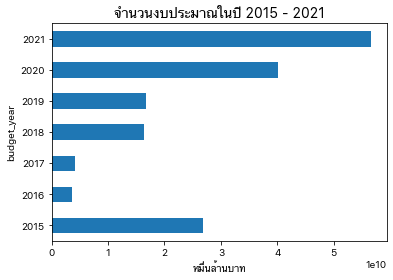

In [91]:
# Bar char of budget money between 2015-2021
df.groupby('budget_year')['project_money'].sum().plot(kind='barh')
plt.title("จำนวนงบประมาณในปี 2015 - 2021", weight='bold', fontsize=14)
plt.xlabel('หมื่นล้านบาท')
plt.show()

แสดง line plot ของจำนวนงบประมาณในแต่ละปี แบ่งตามประเภทของโครงการ
- พบว่าโครงการประเภทก่อสร้างมีแนวโน้มที่ใช้งบประมาณที่สูงขึ้น

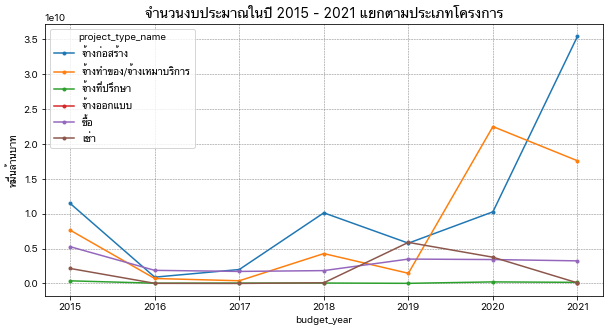

In [92]:
# line plot of budget money between 2015-2021 by project type
df.groupby(['budget_year', 'project_type_name'])['project_money'].sum().unstack().plot(figsize=(10,5), style='.-')
plt.title("จำนวนงบประมาณในปี 2015 - 2021 แยกตามประเภทโครงการ", weight='bold', fontsize=14)
plt.ylabel('หมื่นล้านบาท')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.show()

In [93]:
top_10_type = pd.DataFrame(df.groupby(['project_type_name'])['project_money'].sum())
top_10_type

,project_money
project_type_name,
จ้างก่อสร้าง,75956953000
จ้างทำของ/จ้างเหมาบริการ,54554238826
จ้างที่ปรึกษา,938745160
จ้างออกแบบ,50000000
ซื้อ,20881699181
เช่า,12009547101


แสดง scatter plot ของการกระจายงบประมาณเทียบกับวันที่ทำสัญญา
- ตั้งแต่ปี 2018 มีการกระจายที่มากขึ้น แสดงถึงการใช้งบประมาณที่สูงขึ้น

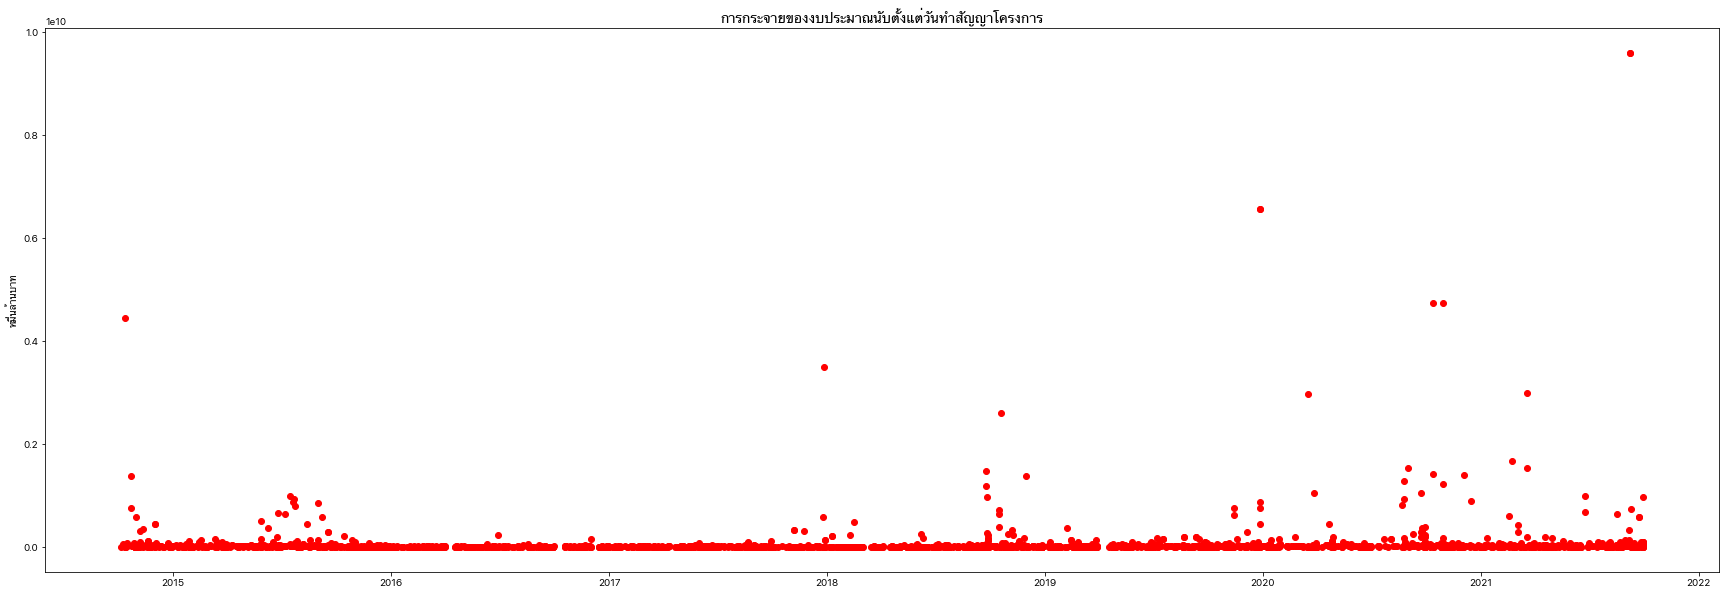

In [94]:
plt.figure(figsize=(30,10))
plt.scatter(df['contract_date'], df['project_money'], color='red')
plt.ylabel('หมี่นล้านบาท')
plt.title("การกระจายของงบประมาณนับตั้งแต่วันทำสัญญาโครงการ", weight='bold', fontsize=14)
plt.show()

แสดง pie chart ของผู้ชนะในการประมูลสัญญาจ้างมากสุด 5 อันดับ
- `บริษัท ปตท. จำกัด(มหาชน)` ชนะไปถึง 385 ครั้ง
- และเป็นการ `ซื้อ` ทั้งหมด คาดว่าเป็นการซื้อน้ำมันจาก `บริษัท ปตท. จำกัด(มหาชน)`

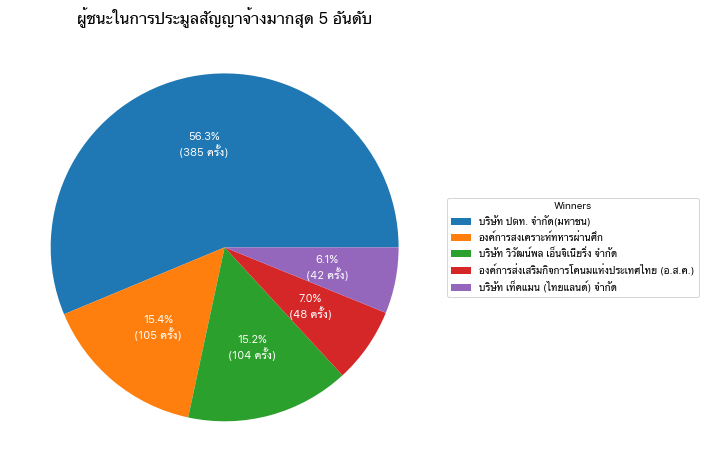

In [95]:
# top 10 winner

top_winner = df.groupby('winner')['winner'].count().sort_values(ascending=False).head(5)

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"), facecolor='white')
key = top_winner.keys()
data = top_winner

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} ครั้ง)".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.legend(wedges, key,
          title="Winners",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=11, weight="bold")
ax.set_title("ผู้ชนะในการประมูลสัญญาจ้างมากสุด 5 อันดับ", fontsize=16, weight="bold")


plt.show()

In [96]:
df[df['winner'] == 'บริษัท ปตท. จำกัด(มหาชน)'].groupby('project_type_name')['project_type_name'].count()

project_type_name
ซื้อ    385
Name: project_type_name, dtype: int64

แสดง 10 อันดับหน่วยงานที่ใช้งบประมาณรวมสูงสุด

In [97]:
top_10_dept = pd.DataFrame(df.groupby('dept_sub_name')['project_money'].sum())
top_10_dept.nlargest(n=10,columns=['project_money'])

,project_money
dept_sub_name,
กองกำจัดมูลฝอย สำนักสิ่งแวดล้อม,41027576350
สำนักการโยธา กรุงเทพมหานคร,32871523719
สำนักงานพัฒนาระบบระบายน้ำ สำนักการระบายน้ำ,26120340000
สำนักงานจัดการมูลฝอยและสิ่งปฏิกูล สำนักสิ่งแวดล้อม,11933918347
กองทะเบียนทรัพย์สินและพัสดุ,6873509403
สำนักงานจัดการคุณภาพน้ำ สำนักการระบายน้ำ,5018872180
สำนักงานสวนสาธารณะ สำนักสิ่งแวดล้อม กรุงเทพมหานคร,4494638429
กองระบบคลอง สำนักการระบายน้ำ,4256551512
สำนักงานระบบควบคุมน้ำ สำนักการระบายน้ำ กรุงเทพมหานคร,3331027400


แสดง 10 อันดับเขตที่ใช้งบประมาณรวมสูงสุด

In [98]:
top_10_dist = pd.DataFrame(df.groupby(['district'])['project_money'].sum())
top_10_dist.nlargest(n=10,columns=['project_money'])

,project_money
district,
ดินแดง,142756595972
พระนคร,8148966672
คลองสาน,3602675031
ราชเทวี,1410094922
ปทุมวัน,668936653
วังทองหลาง,604300000
คลองสามวา,517029578
มีนบุรี,472488266
หนองจอก,448208161


แสดงอัตราส่วนของสถานะโครงการที่ `อยู่ระหว่างดำเนินการ` และ `สิ้นสุดสัญญา`


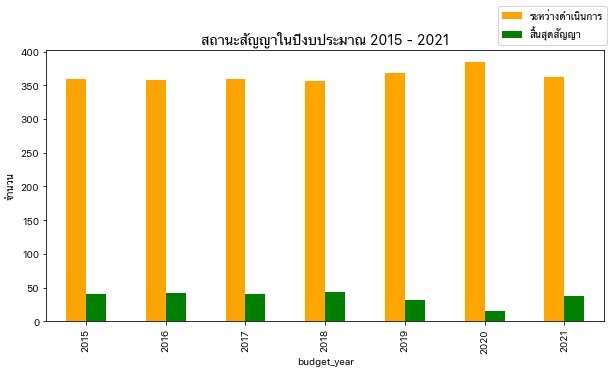

In [99]:
# plot project status
status = df.groupby(['budget_year', 'project_status']).size().unstack(fill_value=0)

ax = status.plot.bar(color=['orange', 'green'], figsize=(10,5))
plt.ylabel("จำนวน")
plt.title("สถานะสัญญาในปีงบประมาณ 2015 - 2021", weight='bold', fontsize=14)
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()

แสดง line plot และ scatter plot ของราคาสัญญาที่ตกลงเปรียบเทียบกับเส้นราคากลาง
- พบว่างบประมาณในช่วงราคาที่ยังไม่สูงยังไม่ห่างจากเส้นราคากลางมาก
- แต่ในช่วงงบประมาณที่สูงขึ้นจะสามารถตกลงราคาที่ต่ำกว่าราคากลางได้

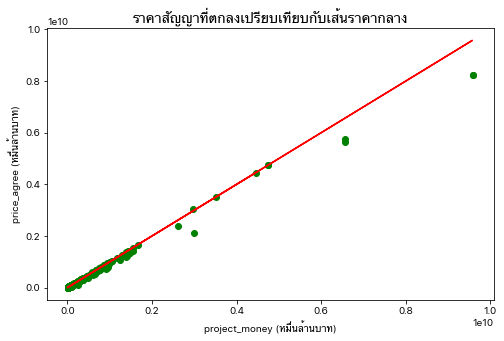

In [100]:
# plot price_agree compare to price_build
plt.figure(figsize=(8,5))
plt.scatter(df['project_money'], df['price_agree'], color='green')
plt.plot(df['price_build'],df['price_build'], color='red')
plt.xlabel('project_money (หมื่นล้านบาท)')
plt.ylabel('price_agree (หมื่นล้านบาท)')
plt.title("ราคาสัญญาที่ตกลงเปรียบเทียบกับเส้นราคากลาง", weight='bold', fontsize=14)
plt.show()

## Summary

- งบประมาณใน `กรุงเทพมหานคร` มีแนวโน้มที่สูงขึ้นตั้งแต่ปี 2018 ซึ่งโครงการที่ใช้งบประมาณมากที่สุดจะเกี่ยวข้องกับ `การก่อสร้าง`
- `บริษัท ปตท. จำกัด(มหาชน)` เป็นผู้ที่ชนะการประมูลโครงการได้มากที่สุด ที่ 385 ครั้ง เป็นโครงการการซื้อน้ำมันทั้งหมด
- `ดินแดง` เป็นเขตที่ใช้งบประมาณสูงที่สุดและหน่วยงาน `กองกำจัดมูลฝอย สำนักสิ่งแวดล้อม` เป็นหน่วยงานที่ใช้งบประมาณสูงที่สุด
- งบประมาณยิ่งสูง ยิ่งสามารถตกลงได้ต่ำกว่าราคากลาง

ปัญหาที่พบ
- เป็นข้อมูลที่เกี่ยวกับโครงการสัญญาของภาครัฐ ทำให้ผู้จัดทำที่ยังไม่มีประสบการณ์ไม่สามารถเข้าใจระเบียบวิธีการของสัญญาที่ซับซ้อนได้มากนัก
- ช้อมูลส่วนมากเป็นข้อมูล categorical